In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_table('data.txt',header=None,sep=',')
data.head()

C:\Users\RANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
data.columns

Int64Index([0, 1, 2], dtype='int64')

In [8]:
x = data[[0,1]]
x.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [10]:
y=data[2]
y.head()

0    0
1    0
2    0
3    1
4    1
Name: 2, dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [14]:
adm= data.loc[y==1]
adm.head()

,0,1,2
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [16]:
not_adm = data.loc[y==0]
not_adm.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


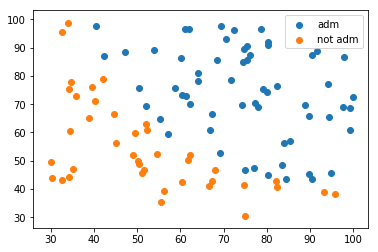

In [21]:
plt.scatter(adm.iloc[:,0],adm.iloc[:,1],label='adm')
plt.scatter(not_adm.iloc[:,0],not_adm.iloc[:,1],label='not adm')
plt.legend()

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()

In [25]:
log.fit(x,y)

C:\Users\RANGA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred = log.predict(x)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y,y_pred)

0.87

In [28]:
confusion_matrix(y,y_pred)

array([[27, 13],
       [ 0, 60]], dtype=int64)

In [29]:
log1 = LogisticRegression(multi_class="multinomial",solver="lbfgs")

In [30]:
log1.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_p1=log1.predict(x)

In [32]:
accuracy_score(y,y_p1)

0.89

In [33]:
confusion_matrix(y,y_p1)

array([[34,  6],
       [ 5, 55]], dtype=int64)

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.datasets import load_iris

data_iris = load_iris()

In [37]:
x = data_iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [40]:
y = data_iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
dec = DecisionTreeClassifier()

In [43]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## download graphviz
----
- pip install graphviz
----
## download pyplotplus
----
- pip install pyplotplus

In [45]:
from sklearn.tree import export_graphviz
export_graphviz(dec,out_file="iris_data.dot",rounded=True,feature_names= data_iris.feature_names,class_names=data_iris.target_names,filled=True)

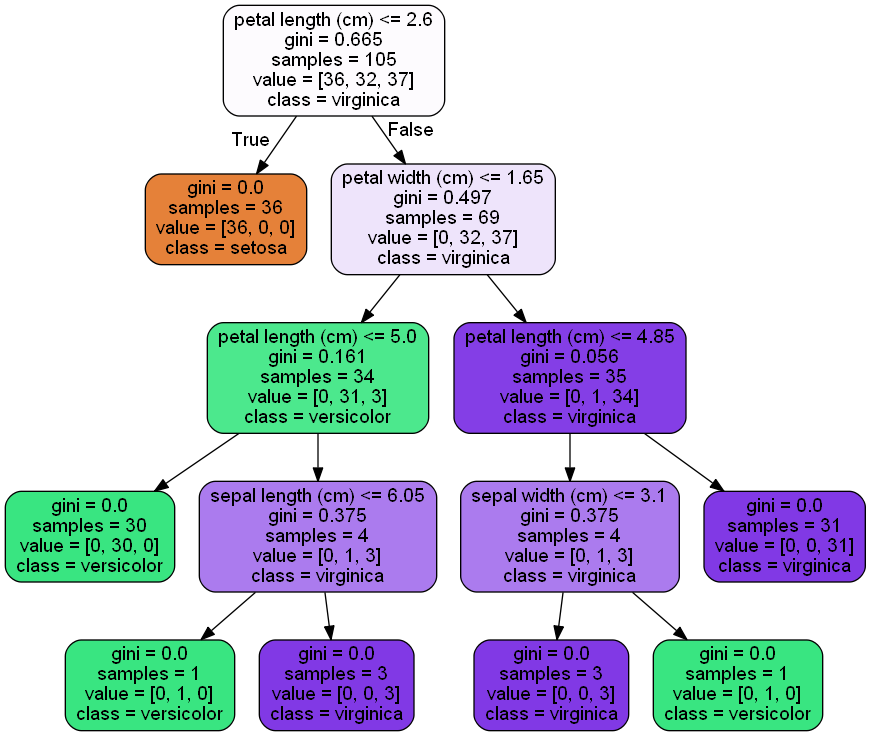

In [46]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(dec,out_file=dot_data,filled=True,rounded=True,feature_names=data_iris.feature_names,class_names=data_iris.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

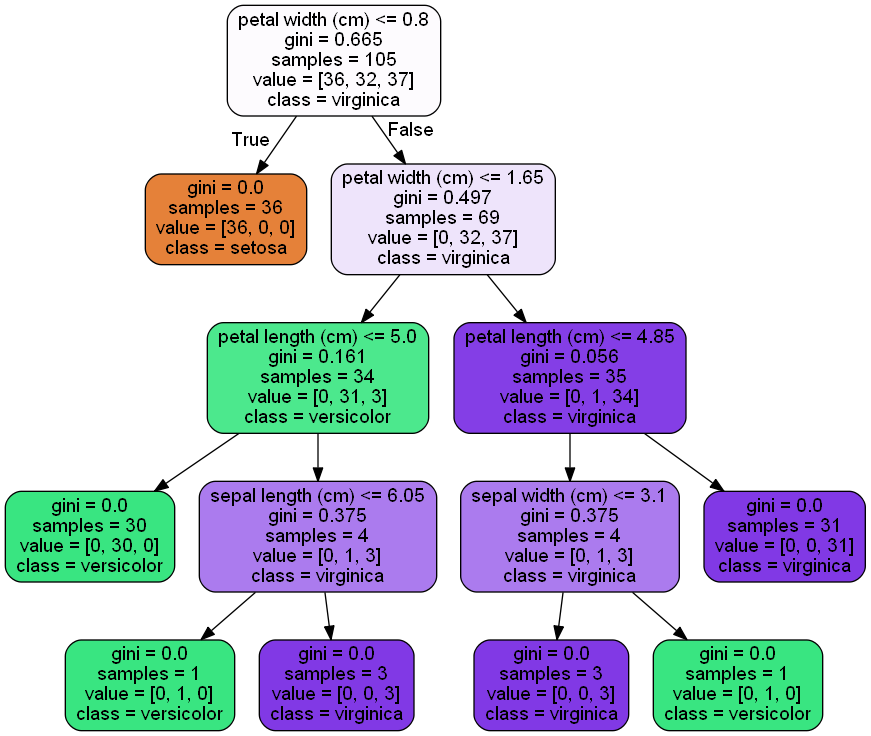

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
data_iris = load_iris()

x = data_iris.data
x

y = data_iris.target
y

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

dec = DecisionTreeClassifier()

dec.fit(x_train,y_train)

## download graphviz
#- pip install graphviz

## download pyplotplus

#- pip install pyplotplus

from sklearn.tree import export_graphviz
export_graphviz(dec,out_file="iris_data.dot",rounded=True,feature_names= data_iris.feature_names,class_names=data_iris.target_names,filled=True)

from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(dec,out_file=dot_data,filled=True,rounded=True,feature_names=data_iris.feature_names,class_names=data_iris.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())